### Data Processing

In [1]:
import spacy
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
df = pd.read_pickle('C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/data_merged.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971264 entries, 0 to 971279
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   text            971264 non-null  object        
 1   date            971264 non-null  datetime64[ns]
 2   speaker_name    971264 non-null  object        
 3   speaker_gender  971264 non-null  object        
 4   speaker_role    884850 non-null  object        
 5   speaker_party   969563 non-null  object        
 6   comments        971264 non-null  object        
 7   id              971264 non-null  object        
 8   speaker_id      971264 non-null  int64         
 9   speech_length   971264 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 81.5+ MB


In [ ]:
#!python -m spacy download de_core_news_sm # downloaded successfully

In [3]:
nlp = spacy.load('de_core_news_sm') 
doc = nlp(df.text[0])
doc

  Sehr geehrter Herr Alterspräsident! So muss ich es jetzt sagen, genau; ich muss mich daran gewöhnen. Nicht lange.  Nicht lange; da haben Sie schon recht. – Liebe Kolleginnen und Kollegen! Meine sehr geehrten Damen und Herren! Die Übernahme der Geschäftsordnung ist eine der ersten wichtigen Entscheidungen, die wir heute zu Beginn der Wahlperiode treffen müssen. Die Geschäftsordnung ist Grundlage für unsere gemeinsame Arbeit. Sie hat sich über viele Wahlperioden bewährt und wird uns auch durch die neue Wahlperiode tragen. Es ist gute Tradition, dass wir die Geschäftsordnung am Anfang einer Wahlperiode mit breiter parlamentarischer Mehrheit übernehmen, und das sollten wir auch heute tun. Sie ist nicht in Stein gemeißelt – das wissen diejenigen, die bereits in der letzten Wahlperiode hier im Bundestag tätig waren –, sondern die Geschäftsordnung ist immer ein, ich sage mal, lebendiges Dokument, das sich den Gegebenheiten des Parlamentarismus, aber auch den Gegebenheiten der Arbeit hier im

In [4]:
def keep_token(token):
    exclude_pos = ['ADV', 'PRON', 'CCONJ', 'PUNCT', 'PART', 'DET', 'ADP','SPACE', 'NUM', 'SYM']
    exclude_tokens = ['kollege', 'kollegin', 'abgeordneter', 'redner', 'rednerin', 'staatssekretär', 'staatssekretärin', 'minister', 'ministerin', 'bundesminister']

    if token.is_alpha and token.ent_type_ != 'PER' and not (token.is_stop or token.pos_ in exclude_pos or token.lemma_.lower() in exclude_tokens):
       return True
    return False

tokens = [token.lemma_.lower() for token in doc if keep_token(token)] # Nur zur Ausgabe
' '.join(tokens)

'geehrt herr alterspräsident sagen gewöhnen lieb geehrt dame herr übernahme geschäftsordnung wichtig entscheidung beginn wahlperiode treffen geschäftsordnung grundlage gemeinsam arbeit wahlperiode bewähren wahlperiode tragen tradition geschäftsordnung anfang wahlperiode breit parlamentarisch mehrheit übernehmen stein meißeln wissen letzter wahlperiode bundestag geschäftsordnung sagen lebendig dokument gegebenheit parlamentarismus gegebenheit arbeit deutsch bundestag anpassen geschäftsordnung entwicklung nachvollziehen letzter wahlperiode beweisen grundlegend änderung beschließen vorangestellen überfällig reform verhaltensregeln begrüßen initiative scheidend präsident geschäftsordnung wahlperiode generalüberholung unterziehen impuls aufnehmen laden fraktion weg vorschlag opposition nehmen möchten aufgreifen möchten diskutieren geschäftsordnung überarbeitet nächster wirken plädieren letzter legislaturperiode eingeführt regelung digital ausschuß beibehalten antrag entnehmen plädieren eing

In [5]:
speeches_processed = []

for speech in tqdm(nlp.pipe(df.text, n_process=6, batch_size=64)):
    tokens = [token.lemma_.lower() for token in speech if keep_token(token)]
    speeches_processed.append(tokens)

0it [00:00, ?it/s]

In [6]:
len(speeches_processed)

971264

In [18]:
df['document_id'] = df.index

#### Save & load processed speeches

In [3]:
import pickle

# Save speeches_processed to a file
#with open('C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/speeches_processed.pkl', 'wb') as f:
 #   pickle.dump(speeches_processed, f)

# Load speeches_processed from the file
with open('C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/speeches_processed.pkl', 'rb') as f:
   loaded_speeches = pickle.load(f)

In [4]:
print(loaded_speeches[0])

['geehrt', 'herr', 'alterspräsident', 'sagen', 'gewöhnen', 'lieb', 'geehrt', 'dame', 'herr', 'übernahme', 'geschäftsordnung', 'wichtig', 'entscheidung', 'beginn', 'wahlperiode', 'treffen', 'geschäftsordnung', 'grundlage', 'gemeinsam', 'arbeit', 'wahlperiode', 'bewähren', 'wahlperiode', 'tragen', 'tradition', 'geschäftsordnung', 'anfang', 'wahlperiode', 'breit', 'parlamentarisch', 'mehrheit', 'übernehmen', 'stein', 'meißeln', 'wissen', 'letzter', 'wahlperiode', 'bundestag', 'geschäftsordnung', 'sagen', 'lebendig', 'dokument', 'gegebenheit', 'parlamentarismus', 'gegebenheit', 'arbeit', 'deutsch', 'bundestag', 'anpassen', 'geschäftsordnung', 'entwicklung', 'nachvollziehen', 'letzter', 'wahlperiode', 'beweisen', 'grundlegend', 'änderung', 'beschließen', 'vorangestellen', 'überfällig', 'reform', 'verhaltensregeln', 'begrüßen', 'initiative', 'scheidend', 'präsident', 'geschäftsordnung', 'wahlperiode', 'generalüberholung', 'unterziehen', 'impuls', 'aufnehmen', 'laden', 'fraktion', 'weg', 'vor

In [5]:
len(loaded_speeches)

971264

### Topic Modelling

In [ ]:
#!pip install gensim

In [6]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

In [7]:
dictionary = Dictionary(loaded_speeches)

In [8]:
dictionary.num_docs

971264

In [9]:
dictionary.filter_extremes(no_below=30, no_above=0.2) #, keep_n=1000)

In [10]:
len(dictionary)

66369

In [11]:
dictionary.token2id

{'absenken': 0,
 'alterspräsident': 1,
 'anfang': 2,
 'anpassen': 3,
 'antrag': 4,
 'arbeit': 5,
 'aufgreifen': 6,
 'aufnehmen': 7,
 'ausschuß': 8,
 'beginn': 9,
 'begrüßen': 10,
 'beibehalten': 11,
 'beschließen': 12,
 'beschlussfähigkeit': 13,
 'beweisen': 14,
 'bewähren': 15,
 'bitte': 16,
 'bitten': 17,
 'breit': 18,
 'bundestag': 19,
 'coronabedingt': 20,
 'dame': 21,
 'deutsch': 22,
 'digital': 23,
 'diskutieren': 24,
 'dokument': 25,
 'eingeführt': 26,
 'entnehmen': 27,
 'entscheidung': 28,
 'entwicklung': 29,
 'erforderlich': 30,
 'fraktion': 31,
 'geehrt': 32,
 'gegebenheit': 33,
 'gemeinsam': 34,
 'generalüberholung': 35,
 'geschäftsordnung': 36,
 'gewöhnen': 37,
 'grundlage': 38,
 'grundlegend': 39,
 'herzlich': 40,
 'impuls': 41,
 'initiative': 42,
 'laden': 43,
 'lebendig': 44,
 'legislaturperiode': 45,
 'letzter': 46,
 'lieb': 47,
 'mehrheit': 48,
 'meißeln': 49,
 'möchten': 50,
 'nachvollziehen': 51,
 'nehmen': 52,
 'notwendig': 53,
 'nächster': 54,
 'opposition': 55,
 '

In [12]:
corpus = [dictionary.doc2bow(doc) for doc in loaded_speeches]

In [13]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50,
                         num_topics=12, workers=8, passes=15)

In [14]:
lda_model.print_topics()

[(0,
  '0.010*"land" + 0.010*"mensch" + 0.009*"deutsch" + 0.008*"deutschland" + 0.008*"bundeswehr" + 0.007*"soldat" + 0.006*"einsatz" + 0.005*"international" + 0.005*"frau" + 0.005*"antrag"'),
 (1,
  '0.011*"dame" + 0.008*"haus" + 0.007*"antrag" + 0.007*"sagen" + 0.007*"deutsch" + 0.007*"glauben" + 0.006*"präsident" + 0.006*"geben" + 0.006*"gesetz" + 0.006*"bundestag"'),
 (2,
  '0.020*"euro" + 0.014*"kommune" + 0.012*"prozent" + 0.011*"sozial" + 0.010*"rente" + 0.009*"mensch" + 0.008*"land" + 0.007*"stadt" + 0.007*"wohnung" + 0.006*"linke"'),
 (3,
  '0.026*"sagen" + 0.012*"wissen" + 0.011*"dame" + 0.010*"frau" + 0.008*"sprechen" + 0.008*"letzter" + 0.008*"thema" + 0.008*"debatte" + 0.007*"glauben" + 0.007*"geben"'),
 (4,
  '0.013*"gesetz" + 0.010*"gesetzentwurf" + 0.008*"fall" + 0.008*"regelung" + 0.006*"verfahren" + 0.004*"deutsch" + 0.004*"entscheidung" + 0.004*"land" + 0.004*"änderung" + 0.004*"grund"'),
 (5,
  '0.061*"frau" + 0.035*"zusatzfrage" + 0.027*"zwischenfrage" + 0.026*"näc

### Topic Prediction

In [30]:
# get topic distribution of speech at loc 150
doc_topic_distribution = lda_model[corpus[150]]
doc_topic_distribution

# alternate way with same result:
#doc_bow = dictionary.doc2bow(loaded_speeches[150])
#lda_model.get_document_topics(doc_bow)

[(1, 0.38960338), (2, 0.010630676), (6, 0.16361731), (9, 0.4310455)]

In [ ]:
df.loc[150].text # get speech at loc 150
loaded_speeches[150] # same speech

### Get Documents in Topic

In [19]:
target_topic = 9
#documents_in_topic = [doc for doc in corpus if max(lda_model[doc], key=lambda x: x[1])[0] == target_topic]

# Get the topic with the highest proportion for each document
max_topic_for_each_doc = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Identify the documents associated with the target topic
documents_in_topic = [doc_id for doc_id, topic in zip(df['document_id'], max_topic_for_each_doc) if topic == target_topic]
documents_in_topic

[20,
 30,
 34,
 91,
 105,
 118,
 151,
 152,
 154,
 155,
 157,
 159,
 160,
 161,
 162,
 163,
 166,
 169,
 172,
 174,
 176,
 178,
 221,
 222,
 238,
 244,
 259,
 262,
 263,
 268,
 269,
 272,
 274,
 275,
 277,
 278,
 282,
 283,
 284,
 287,
 288,
 290,
 292,
 293,
 294,
 295,
 297,
 299,
 300,
 301,
 318,
 354,
 355,
 357,
 358,
 371,
 375,
 400,
 424,
 425,
 426,
 435,
 436,
 437,
 447,
 449,
 450,
 451,
 452,
 455,
 484,
 490,
 496,
 550,
 552,
 562,
 564,
 565,
 566,
 567,
 568,
 570,
 571,
 575,
 576,
 577,
 578,
 581,
 582,
 584,
 586,
 588,
 590,
 592,
 593,
 594,
 595,
 596,
 597,
 600,
 601,
 603,
 652,
 653,
 654,
 655,
 799,
 802,
 803,
 806,
 807,
 808,
 809,
 811,
 812,
 813,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 826,
 828,
 831,
 832,
 833,
 834,
 837,
 840,
 841,
 843,
 844,
 845,
 847,
 848,
 849,
 850,
 852,
 853,
 854,
 855,
 921,
 1031,
 1081,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1123,
 1126,
 1127,
 1129,
 1131,
 1132,
 1152,
 1155,
 1196,
 1198,
 1199,


In [22]:
# Retrieve the selected documents from the original dataframe
selected_documents = df[df['document_id'].isin(documents_in_topic)]
selected_documents.loc[20].text

'  Sehr geehrte Frau Präsidentin! Meine sehr geehrten Damen und Herren! Das Virus ist noch unter uns und bedroht die Gesundheit der Bürgerinnen und Bürger. Deshalb ist es ganz wichtig, dass wir alle Maßnahmen ergreifen, um sicher zu sein, dass wir die Gesundheit der Bürgerinnen und Bürger unseres Landes schützen können. Auch wenn die Lage anders ist, weil so viele geimpft sind, ist sie noch nicht gut, ganz besonders deshalb, weil bisher nicht genügend Bürgerinnen und Bürger von der Impfmöglichkeit Gebrauch gemacht haben. Deshalb müssen wir weiter vorsichtig sein. Wir müssen vorsichtig sein und bleiben und zum Beispiel dafür Sorge tragen, dass die Maskenpflicht weiter beachtet und durchgesetzt werden kann, beispielsweise bei Verkehrsbetrieben, und dass bei Veranstaltungen Abstandsregeln und Hygieneregeln gelten und dass Impfnachweise vorgelegt werden müssen. All die Dinge, die wir schon kennen, werden auch in nächster Zeit weiterhin erforderlich sein. Das ist ein Unterschied zwischen un

#### Historical Development of Speeches in Topic

In [23]:
selected_documents['year'] = selected_documents['date'].dt.year

C:\Users\Ana\AppData\Local\Temp\ipykernel_22312\282677269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_documents['year'] = selected_documents['date'].dt.year


In [31]:
speeches_per_year = selected_documents.groupby('year').size()
speeches_per_year

year
1949       8
1950      45
1951      45
1952      79
1953      50
        ... 
2019     980
2020    1156
2021     834
2022     883
2023     442
Length: 75, dtype: int64

In [2]:
import pickle
# Save speeches_processed to a file
#with open('speeches_per_year.pkl', 'wb') as f:
 #  pickle.dump(speeches_per_year, f)

# Load speeches_processed from the file
with open('speeches_per_year.pkl', 'rb') as f:
   loaded_speeches_per_year = pickle.load(f)

In [4]:
loaded_speeches_per_year

year
1949       8
1950      45
1951      45
1952      79
1953      50
        ... 
2019     980
2020    1156
2021     834
2022     883
2023     442
Length: 75, dtype: int64

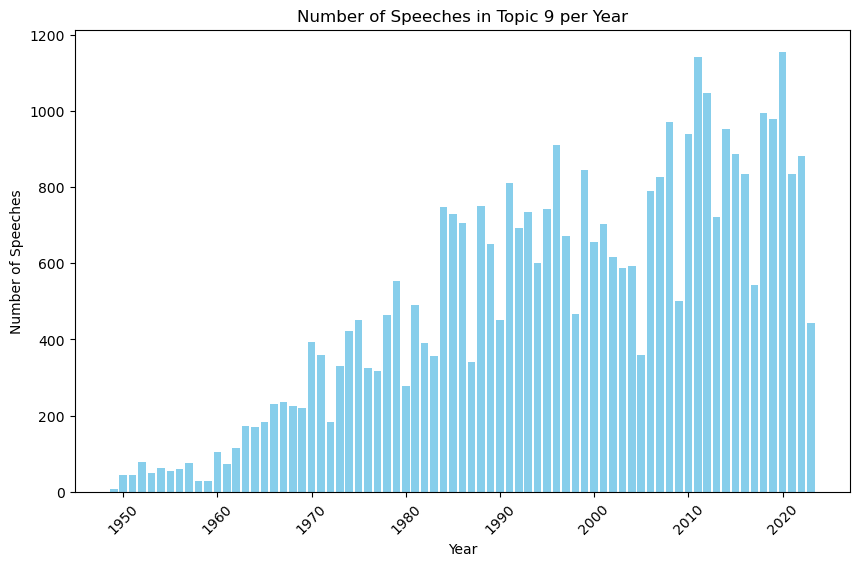

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(loaded_speeches_per_year.index, loaded_speeches_per_year.values, color='skyblue')
plt.title('Number of Speeches in Topic 9 per Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
plt.show()


### Coherence Model

In [14]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=loaded_speeches, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

#cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')

### Visualization with pyLDAvis

In [15]:
#!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.gensim

In [16]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
topic_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
topic_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.027383  0.075713       1        1  15.204273
3      0.006396 -0.017907       2        1  14.541747
11     0.110402 -0.052270       3        1  10.122011
6      0.094901  0.003338       4        1  10.086261
8      0.094603 -0.027131       5        1   9.026026
4      0.050383  0.056402       6        1   8.868150
9      0.089408 -0.051743       7        1   7.276178
0      0.079958 -0.028448       8        1   6.999835
7     -0.267442  0.326154       9        1   6.207930
10     0.094274 -0.036464      10        1   5.668210
2      0.077580 -0.023526      11        1   3.968494
5     -0.457847 -0.224117      12        1   2.030885, topic_info=            Term           Freq          Total Category  logprob  loglift
107         frau  366361.000000  366361.000000  Default  30.0000  30.0000
31      fraktion  276269.000000  276269.000000  Default  29.0000  29.0000
587    ausschuss  148326.000000  148326.000000  Default  28.0000  28.0000
2128   milliarde  175745.000000  175745.000000  Default  27.0000  27.0000
1768  europäisch  240042.000000  240042.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
436      schluss    7375.646615   32149.729194  Topic12  -5.2612   2.4245
16         bitte    9631.979098   90834.196283  Topic12  -4.9943   1.6528
733       berlin    7780.915328   59530.137704  Topic12  -5.2077   1.8619
1046    ergebnis    6288.433619   83001.774595  Topic12  -5.4206   1.3165
976    verfügung    5770.936382   58943.152425  Topic12  -5.5065   1.5730

[1102 rows x 6 columns], token_table=       Topic      Freq                   Term
term                                         
16952      3  0.032620                 aachen
16952      4  0.028506                 aachen
16952      7  0.005877                 aachen
16952      9  0.013518                 aachen
16952     10  0.020571                 aachen
...      ...       ...                    ...
4989      11  0.003794             ökologisch
19926     11  0.999182         überhangmandat
2529       1  0.016757            überweisung
2529       9  0.983217            überweisung
18146      9  0.999978  überweisungsvorschlag

[4153 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 12, 7, 9, 5, 10, 1, 8, 11, 3, 6])